In [16]:
# Customer Value Analytics - Logistics Insurance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Customer Value Analytics - Logistics Insurance")
print("🚀 Streamlined Analysis with Automated EDA")
print("=" * 60)



📊 Customer Value Analytics - Logistics Insurance
🚀 Streamlined Analysis with Automated EDA


In [17]:
# ============================================================================
# 1. DATA LOADING AND AUTOMATED EDA WITH SWEETVIZ
# ============================================================================

print("\n🔍 STEP 1: Data Loading")
print("-" * 40)


from google.colab import drive
drive.mount('/content/drive')

# Cargar el dataset desde drive
df = pd.read_csv('/content/drive/MyDrive/dbsportfolio/LTV/customers_data.csv')


print(f"✅ Dataset loaded: {df.shape[0]} customers, {df.shape[1]} features")

# Convert date column
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])


print("\n🔍 Data Quality Assessment:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate records: {df.duplicated().sum()}")
print(f"   • Date range: {df['last_payment_date'].min()} to {df['last_payment_date'].max()}")

# Basic statistics
print(f"\n📊 Key Business Metrics:")
print(f"   • Annual premium range: ${df['annual_premium_2023'].min():,.0f} - ${df['annual_premium_2023'].max():,.0f}")
print(f"   • Fleet size range: {df['fleet_size'].min()} - {df['fleet_size'].max()} vehicles")
print(f"   • Customer tenure: {df['years_as_customer'].min()} - {df['years_as_customer'].max()} years")

# Data types and basic info
print(f"\n📋 Dataset Overview:")
print(df.info())


🔍 STEP 1: Data Loading
----------------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded: 1000 customers, 22 features

🔍 Data Quality Assessment:
   • Missing values: 0
   • Duplicate records: 0
   • Date range: 2023-01-01 00:00:00 to 2023-12-30 00:00:00

📊 Key Business Metrics:
   • Annual premium range: $5,027 - $69,725
   • Fleet size range: 1 - 300 vehicles
   • Customer tenure: 1 - 15 years

📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             1000 non-null   int64         
 1   company_name            1000 non-null   object        
 2   fleet_size              1000 non-null   int64         
 3   cargo_type              1000 non-null   object 


🔍 STEP 2: Exploratory Data Analysis
----------------------------------------


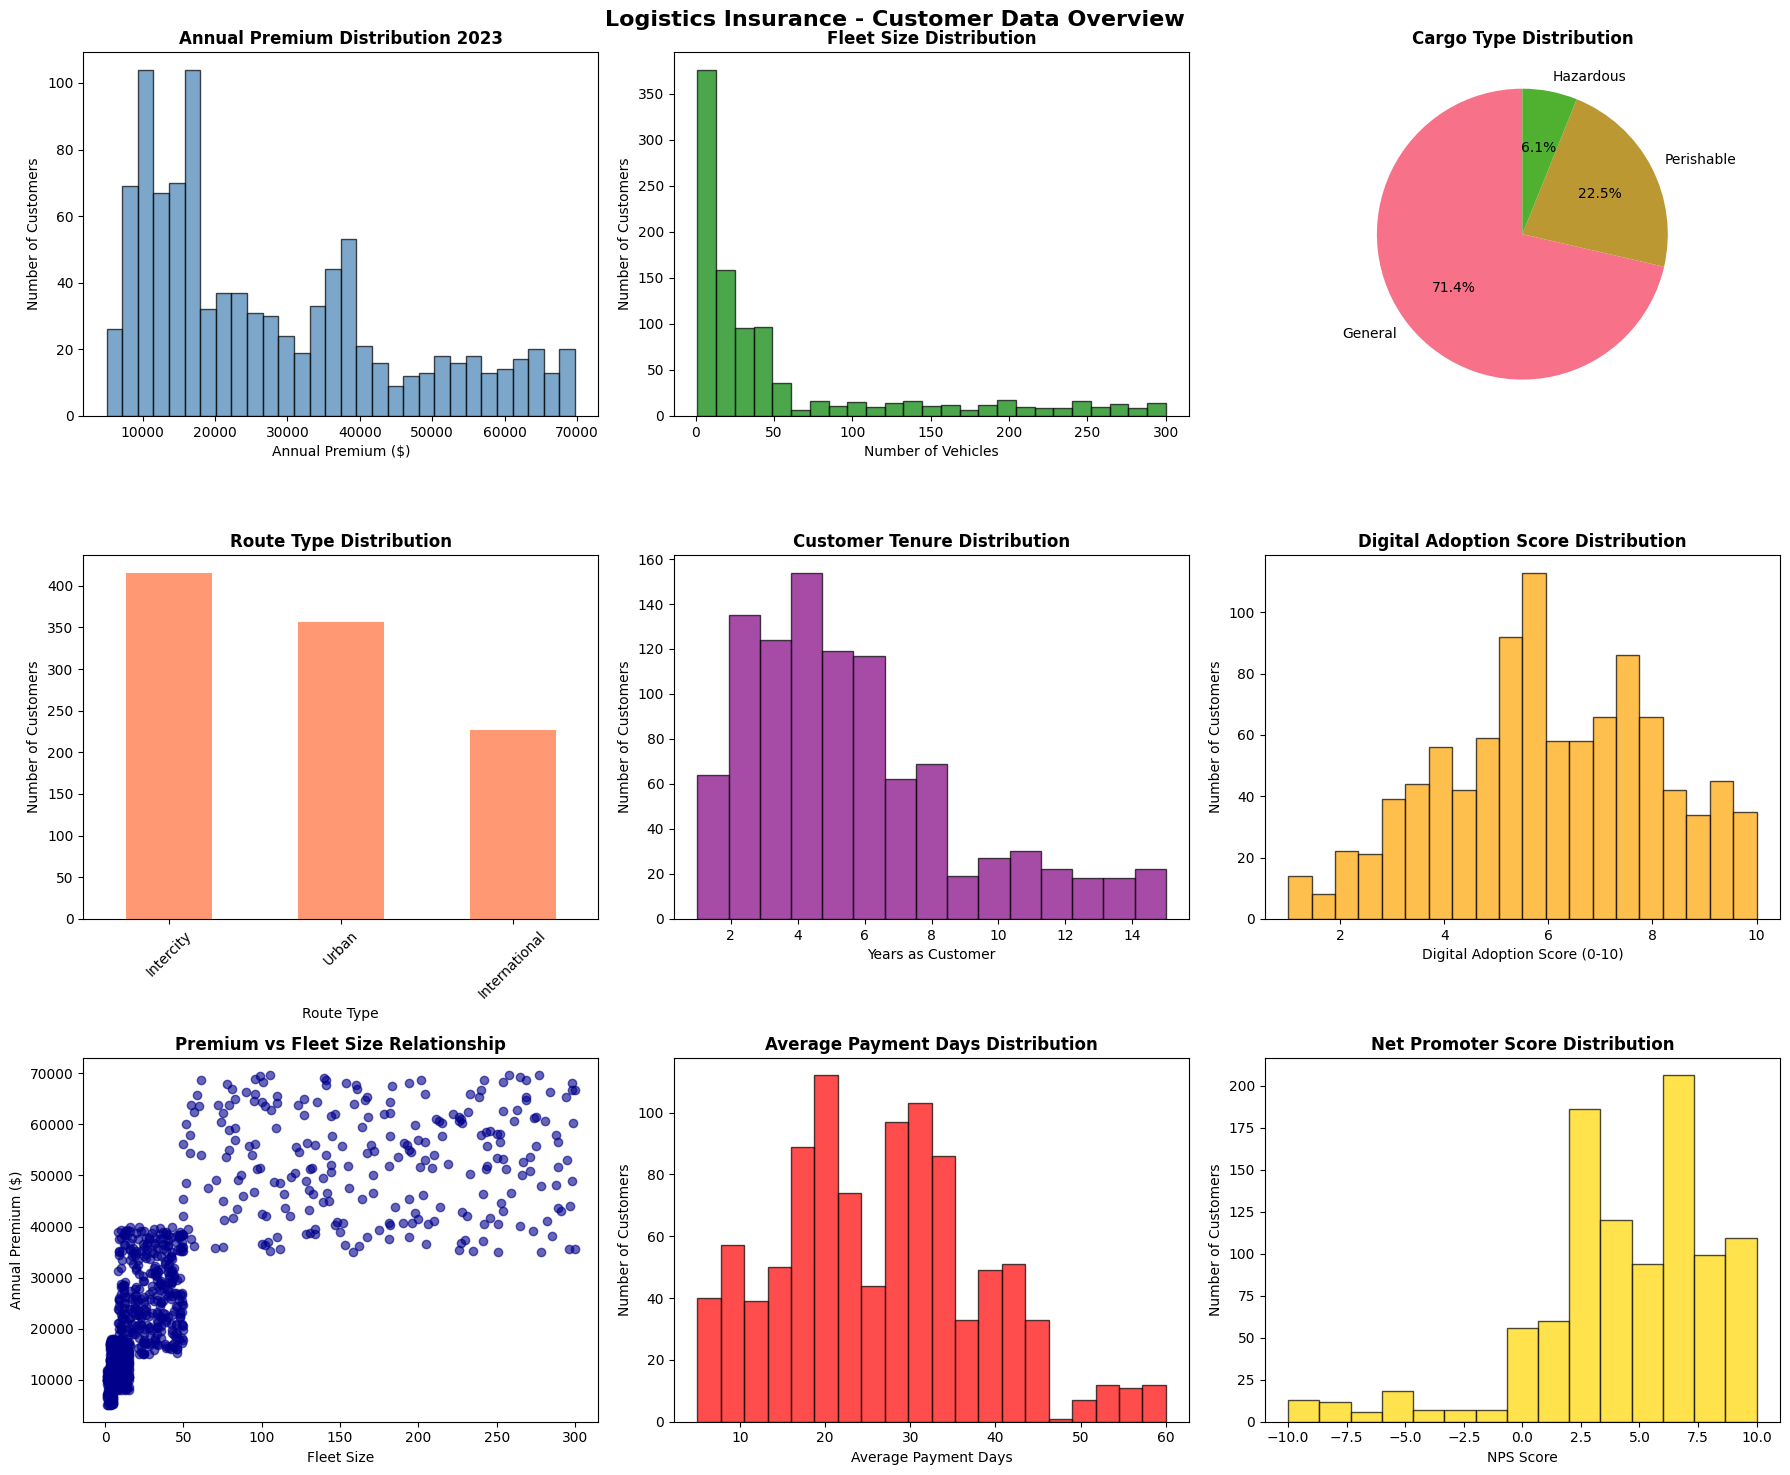

📈 Key EDA Insights:
   • Average annual premium: $27,521
   • Average fleet size: 56.5 vehicles
   • Average customer tenure: 5.5 years
   • Average payment days: 26.4 days
   • Average digital adoption: 6.0/10


In [18]:
# ============================================================================
# 2. EXPLORATORY DATA ANALYSIS (MANUAL)
# ============================================================================

print("\n🔍 STEP 2: Exploratory Data Analysis")
print("-" * 40)

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive EDA visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Annual Premium Distribution
axes[0,0].hist(df['annual_premium_2023'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
axes[0,0].set_title('Annual Premium Distribution 2023', fontweight='bold')
axes[0,0].set_xlabel('Annual Premium ($)')
axes[0,0].set_ylabel('Number of Customers')

# 2. Fleet Size Distribution
axes[0,1].hist(df['fleet_size'], bins=25, alpha=0.7, color='green', edgecolor='black')
axes[0,1].set_title('Fleet Size Distribution', fontweight='bold')
axes[0,1].set_xlabel('Number of Vehicles')
axes[0,1].set_ylabel('Number of Customers')

# 3. Cargo Type Distribution
cargo_counts = df['cargo_type'].value_counts()
axes[0,2].pie(cargo_counts.values, labels=cargo_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Cargo Type Distribution', fontweight='bold')

# 4. Route Type Distribution
route_counts = df['route_type'].value_counts()
route_counts.plot(kind='bar', ax=axes[1,0], color='coral', alpha=0.8)
axes[1,0].set_title('Route Type Distribution', fontweight='bold')
axes[1,0].set_xlabel('Route Type')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Customer Tenure Distribution
axes[1,1].hist(df['years_as_customer'], bins=15, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Customer Tenure Distribution', fontweight='bold')
axes[1,1].set_xlabel('Years as Customer')
axes[1,1].set_ylabel('Number of Customers')

# 6. Digital Adoption Score
axes[1,2].hist(df['digital_adoption_score'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1,2].set_title('Digital Adoption Score Distribution', fontweight='bold')
axes[1,2].set_xlabel('Digital Adoption Score (0-10)')
axes[1,2].set_ylabel('Number of Customers')

# 7. Premium vs Fleet Size Scatter
axes[2,0].scatter(df['fleet_size'], df['annual_premium_2023'], alpha=0.6, color='darkblue')
axes[2,0].set_title('Premium vs Fleet Size Relationship', fontweight='bold')
axes[2,0].set_xlabel('Fleet Size')
axes[2,0].set_ylabel('Annual Premium ($)')

# 8. Payment Days Distribution
axes[2,1].hist(df['avg_payment_days'], bins=20, alpha=0.7, color='red', edgecolor='black')
axes[2,1].set_title('Average Payment Days Distribution', fontweight='bold')
axes[2,1].set_xlabel('Average Payment Days')
axes[2,1].set_ylabel('Number of Customers')

# 9. NPS Score Distribution
axes[2,2].hist(df['nps_score'], bins=15, alpha=0.7, color='gold', edgecolor='black')
axes[2,2].set_title('Net Promoter Score Distribution', fontweight='bold')
axes[2,2].set_xlabel('NPS Score')
axes[2,2].set_ylabel('Number of Customers')

plt.suptitle('Logistics Insurance - Customer Data Overview', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Key insights from EDA
print("📈 Key EDA Insights:")
print(f"   • Average annual premium: ${df['annual_premium_2023'].mean():,.0f}")
print(f"   • Average fleet size: {df['fleet_size'].mean():.1f} vehicles")
print(f"   • Average customer tenure: {df['years_as_customer'].mean():.1f} years")
print(f"   • Average payment days: {df['avg_payment_days'].mean():.1f} days")
print(f"   • Average digital adoption: {df['digital_adoption_score'].mean():.1f}/10")


⚙️ STEP 3: Feature Engineering for Business Analysis
----------------------------------------
⚙️ Creating business metrics...
✅ Business Features Created:
   • Average Annual Revenue: $26,128
   • Average Renewal Rate: 0.77
   • Average Loss Ratio: 0.44
   • Payment Reliability: 0.56

📊 Feature Engineering Complete - Ready for Analysis

🔍 STEP 3A: Feature Relevance Analysis
----------------------------------------
📊 Feature Correlation Analysis:
                        avg_annual_revenue  renewal_rate  loss_ratio  \
avg_annual_revenue                   1.000         0.393      -0.731   
renewal_rate                         0.393         1.000      -0.364   
loss_ratio                          -0.731        -0.364       1.000   
fleet_size                           0.774         0.338      -0.648   
digital_adoption_score               0.793         0.402      -0.759   
payment_reliability                  0.769         0.372      -0.678   
years_as_customer                    0.671   

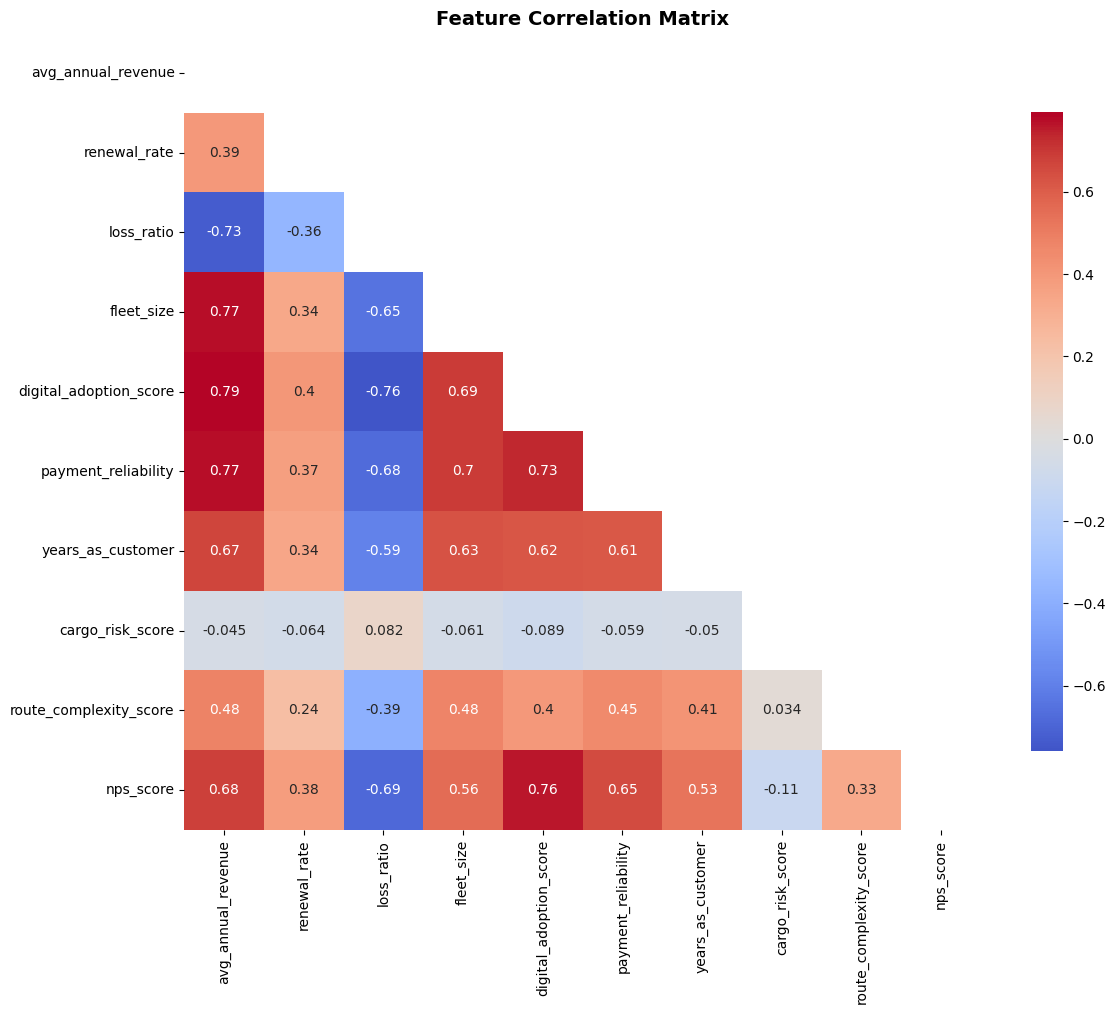


⚠️ Highly correlated features (>0.8):


In [19]:


# ============================================================================
# 3. FEATURE ENGINEERING FOR BUSINESS ANALYSIS
# ============================================================================

print("\n⚙️ STEP 3: Feature Engineering for Business Analysis")
print("-" * 40)

# Reference date for recency calculation
reference_date = datetime(2024, 1, 1)

# CALCULATED METRICS for business analysis
print("⚙️ Creating business metrics...")

# Average annual revenue (last 3 years)
df['avg_annual_revenue'] = (df['annual_premium_2021'] + df['annual_premium_2022'] + df['annual_premium_2023']) / 3

# Average renewal rate (last 3 years)
df['renewal_rate'] = (df['renewal_status_2021'] + df['renewal_status_2022'] + df['renewal_status_2023']) / 3

# Loss ratio (critical for insurance)
df['total_claims'] = df['total_claims_2021'] + df['total_claims_2022'] + df['total_claims_2023']
df['total_premiums'] = df['annual_premium_2021'] + df['annual_premium_2022'] + df['annual_premium_2023']
df['loss_ratio'] = df['total_claims'] / df['total_premiums']

# Risk scoring
risk_mapping = {'General': 1, 'Perishable': 2, 'Hazardous': 3}
df['cargo_risk_score'] = df['cargo_type'].map(risk_mapping)

route_mapping = {'Urban': 1, 'Intercity': 2, 'International': 3}
df['route_complexity_score'] = df['route_type'].map(route_mapping)

# Payment reliability (inverse relationship with payment days)
df['payment_reliability'] = 1 / (1 + df['avg_payment_days'] / 30)

print("✅ Business Features Created:")
print(f"   • Average Annual Revenue: ${df['avg_annual_revenue'].mean():,.0f}")
print(f"   • Average Renewal Rate: {df['renewal_rate'].mean():.2f}")
print(f"   • Average Loss Ratio: {df['loss_ratio'].mean():.2f}")
print(f"   • Payment Reliability: {df['payment_reliability'].mean():.2f}")

print(f"\n📊 Feature Engineering Complete - Ready for Analysis")


# ============================================================================
# FEATURE SELECTION - CORRELATION ANALYSIS
# ============================================================================

print("\n🔍 STEP 3A: Feature Relevance Analysis")
print("-" * 40)

# Prepare all potential features
potential_features = [
    'avg_annual_revenue', 'renewal_rate', 'loss_ratio', 'fleet_size',
    'digital_adoption_score', 'payment_reliability', 'years_as_customer',
    'cargo_risk_score', 'route_complexity_score', 'nps_score'
]

# Create correlation matrix
feature_data = df[potential_features]
correlation_matrix = feature_data.corr()

print("📊 Feature Correlation Analysis:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated features (>0.8 or <-0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  corr_value))

print(f"\n⚠️ Highly correlated features (>0.8):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"   • {feat1} ↔ {feat2}: {corr:.3f}")

In [20]:
# ============================================================================
# FEATURE SELECTION - VARIANCE ANALYSIS
# ============================================================================

print("\n🔍 STEP 3B: Feature Variance Analysis")
print("-" * 40)

# Calculate coefficient of variation for each feature
feature_stats = {}
for feature in potential_features:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    cv = std_val / mean_val if mean_val != 0 else 0

    feature_stats[feature] = {
        'mean': mean_val,
        'std': std_val,
        'coefficient_of_variation': cv,
        'unique_values': df[feature].nunique(),
        'missing_pct': (df[feature].isnull().sum() / len(df)) * 100
    }

# Convert to DataFrame for easy viewing
stats_df = pd.DataFrame(feature_stats).T
stats_df = stats_df.sort_values('coefficient_of_variation', ascending=False)

print("📊 Feature Variability Analysis:")
print(stats_df.round(3))

# Features with low variance might not be useful for clustering
low_variance_features = stats_df[stats_df['coefficient_of_variation'] < 0.1].index.tolist()
if low_variance_features:
    print(f"\n⚠️ Low variance features (might not be useful):")
    for feat in low_variance_features:
        print(f"   • {feat}: CV = {stats_df.loc[feat, 'coefficient_of_variation']:.3f}")


🔍 STEP 3B: Feature Variance Analysis
----------------------------------------
📊 Feature Variability Analysis:
                             mean        std  coefficient_of_variation  \
fleet_size                 56.518     77.587                     1.373   
nps_score                   4.266      3.950                     0.926   
avg_annual_revenue      26127.618  16635.999                     0.637   
years_as_customer           5.456      3.410                     0.625   
loss_ratio                  0.441      0.196                     0.443   
cargo_risk_score            1.347      0.591                     0.439   
route_complexity_score      1.870      0.753                     0.403   
digital_adoption_score      6.008      2.060                     0.343   
renewal_rate                0.775      0.258                     0.333   
payment_reliability         0.556      0.119                     0.213   

                        unique_values  missing_pct  
fleet_size           

In [21]:
# ============================================================================
# 3. FEATURE ENGINEERING FOR CLUSTERING
# ============================================================================

print("\n⚙️ STEP 3: Business Feature Engineering for Segmentation")
print("-" * 40)

# Calculate key business metrics directly
print("⚙️ Creating business features...")

# Average annual revenue (last 3 years)
df['avg_annual_revenue'] = (df['annual_premium_2021'] + df['annual_premium_2022'] + df['annual_premium_2023']) / 3

# Average renewal rate (last 3 years)
df['renewal_rate'] = (df['renewal_status_2021'] + df['renewal_status_2022'] + df['renewal_status_2023']) / 3

# Loss ratio (critical for insurance)
df['total_claims'] = df['total_claims_2021'] + df['total_claims_2022'] + df['total_claims_2023']
df['total_premiums'] = df['annual_premium_2021'] + df['annual_premium_2022'] + df['annual_premium_2023']
df['loss_ratio'] = df['total_claims'] / df['total_premiums']

# Risk scoring
risk_mapping = {'General': 1, 'Perishable': 2, 'Hazardous': 3}
df['cargo_risk_score'] = df['cargo_type'].map(risk_mapping)

route_mapping = {'Urban': 1, 'Intercity': 2, 'International': 3}
df['route_complexity_score'] = df['route_type'].map(route_mapping)

# Payment reliability (inverse relationship with payment days)
df['payment_reliability'] = 1 / (1 + df['avg_payment_days'] / 30)

print("✅ Business Features Created:")
print(f"   • Average Annual Revenue: ${df['avg_annual_revenue'].mean():,.0f}")
print(f"   • Average Renewal Rate: {df['renewal_rate'].mean():.2f}")
print(f"   • Average Loss Ratio: {df['loss_ratio'].mean():.2f}")
print(f"   • Payment Reliability: {df['payment_reliability'].mean():.2f}")

# ============================================================================
# 4. FEATURE SELECTION FOR CLUSTERING
# ============================================================================

print("\n🎯 STEP 4: Feature Selection for Customer Segmentation")
print("-" * 40)

# Select features for clustering (logistics insurance specific)
clustering_features = [
    'avg_annual_revenue',         # How much they pay annually
    'renewal_rate',               # How often they renew
    'loss_ratio',                 # Risk profile (claims/premiums)
    'cargo_risk_score',           # Type of business risk
]

print(f"✅ Selected {len(clustering_features)} features for segmentation:")
for i, feature in enumerate(clustering_features, 1):
    print(f"   {i:2d}. {feature}")

# Create clustering dataset
X = df[clustering_features].copy()

# Handle any missing values
X = X.fillna(X.median())

print(f"\n📊 Clustering Dataset Prepared:")
print(f"   • Shape: {X.shape}")
print(f"   • Missing values: {X.isnull().sum().sum()}")

# Feature scaling (essential for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features standardized for clustering")

# Continue with K-means selection and clustering...


⚙️ STEP 3: Business Feature Engineering for Segmentation
----------------------------------------
⚙️ Creating business features...
✅ Business Features Created:
   • Average Annual Revenue: $26,128
   • Average Renewal Rate: 0.77
   • Average Loss Ratio: 0.44
   • Payment Reliability: 0.56

🎯 STEP 4: Feature Selection for Customer Segmentation
----------------------------------------
✅ Selected 4 features for segmentation:
    1. avg_annual_revenue
    2. renewal_rate
    3. loss_ratio
    4. cargo_risk_score

📊 Clustering Dataset Prepared:
   • Shape: (1000, 4)
   • Missing values: 0
✅ Features standardized for clustering



🔍 STEP 5: Determining Optimal Number of Clusters
----------------------------------------
Testing different values of K:
K | Inertia    | Silhouette
------------------------------
2 |  2586.09 |    0.328
3 |  1917.77 |    0.359
4 |  1538.31 |    0.361
5 |  1348.70 |    0.343
6 |  1180.99 |    0.347
7 |  1024.80 |    0.361
8 |   921.42 |    0.361

🎯 OPTIMAL K SELECTED: 7
   • Best Silhouette Score: 0.361
   • Corresponding Inertia: 1024.80

📊 Creating Elbow Curve and Silhouette Analysis...


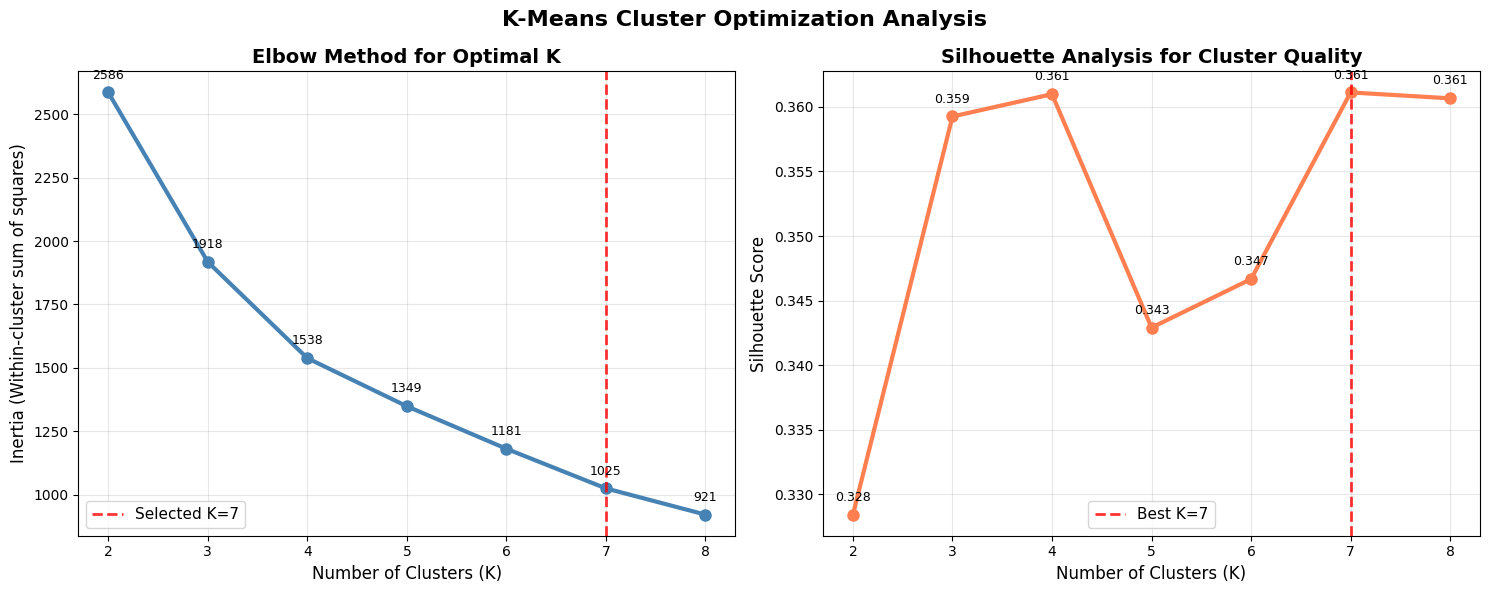


📈 CLUSTER OPTIMIZATION RESULTS:
Detailed Results:
   K   Inertia  Silhouette_Score  Inertia_Decrease  Inertia_Decrease_Rate
0  2  2586.094             0.328               NaN                    NaN
1  3  1917.771             0.359           668.324                    NaN
2  4  1538.312             0.361           379.458                 -0.432
3  5  1348.705             0.343           189.608                 -0.500
4  6  1180.995             0.347           167.710                 -0.115
5  7  1024.801             0.361           156.193                 -0.069
6  8   921.418             0.361           103.383                 -0.338

🎯 SELECTION RATIONALE:
   • K=7 provides the highest silhouette score (0.361)
   • This indicates the best separation between clusters
   • Silhouette scores interpretation:
     - 0.7-1.0: Strong structure
     - 0.5-0.7: Reasonable structure
     - 0.25-0.5: Weak structure
     - <0.25: No substantial structure
   ⚠️ Our score (0.361) indicates ACCEPTA

In [22]:
# ============================================================================
# 5. OPTIMAL K SELECTION FOR K-MEANS
# ============================================================================

print("\n🔍 STEP 5: Determining Optimal Number of Clusters")
print("-" * 40)

# Test different values of K
K_range = range(2, 9)  # Probamos de 2 a 8 clusters
inertias = []
silhouette_scores = []

print("Testing different values of K:")
print("K | Inertia    | Silhouette")
print("-" * 30)

for k in K_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    inertias.append(inertia)
    silhouette_scores.append(silhouette_avg)

    print(f"{k} | {inertia:8.2f} | {silhouette_avg:8.3f}")

# Find optimal K (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\n🎯 OPTIMAL K SELECTED: {optimal_k}")
print(f"   • Best Silhouette Score: {best_silhouette:.3f}")
print(f"   • Corresponding Inertia: {inertias[optimal_k-2]:.2f}")

# ============================================================================
# VISUALIZATION: ELBOW CURVE + SILHOUETTE ANALYSIS
# ============================================================================

print("\n📊 Creating Elbow Curve and Silhouette Analysis...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. ELBOW CURVE
ax1.plot(K_range, inertias, 'bo-', linewidth=3, markersize=8, color='steelblue')
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
ax1.set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.8, linewidth=2,
           label=f'Selected K={optimal_k}')
ax1.legend(fontsize=11)

# Add annotations for better visualization
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    ax1.annotate(f'{inertia:.0f}', (k, inertia), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

# 2. SILHOUETTE ANALYSIS
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=3, markersize=8, color='coral')
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Analysis for Cluster Quality', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.8, linewidth=2,
           label=f'Best K={optimal_k}')
ax2.legend(fontsize=11)

# Add annotations
for i, (k, score) in enumerate(zip(K_range, silhouette_scores)):
    ax2.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.suptitle('K-Means Cluster Optimization Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# INTERPRETATION OF RESULTS
# ============================================================================

print("\n📈 CLUSTER OPTIMIZATION RESULTS:")
print("=" * 50)

# Show detailed results table
results_df = pd.DataFrame({
    'K': K_range,
    'Inertia': inertias,
    'Silhouette_Score': silhouette_scores
})

# Calculate elbow score (rate of inertia decrease)
results_df['Inertia_Decrease'] = results_df['Inertia'].diff().abs()
results_df['Inertia_Decrease_Rate'] = results_df['Inertia_Decrease'].pct_change()

print("Detailed Results:")
print(results_df.round(3))

# Business interpretation
print(f"\n🎯 SELECTION RATIONALE:")
print(f"   • K={optimal_k} provides the highest silhouette score ({best_silhouette:.3f})")
print(f"   • This indicates the best separation between clusters")
print(f"   • Silhouette scores interpretation:")
print(f"     - 0.7-1.0: Strong structure")
print(f"     - 0.5-0.7: Reasonable structure")
print(f"     - 0.25-0.5: Weak structure")
print(f"     - <0.25: No substantial structure")

if best_silhouette >= 0.5:
    print(f"   ✅ Our score ({best_silhouette:.3f}) indicates GOOD cluster structure")
elif best_silhouette >= 0.25:
    print(f"   ⚠️ Our score ({best_silhouette:.3f}) indicates ACCEPTABLE cluster structure")
else:
    print(f"   ❌ Our score ({best_silhouette:.3f}) indicates WEAK cluster structure")

print(f"\n✅ Proceeding with K={optimal_k} clusters for final segmentation")

In [23]:
# ============================================================================
# 6. FINAL K-MEANS CLUSTERING WITH K=4
# ============================================================================

print("\n🎯 STEP 6: Final Customer Segmentation with K=4")
print("-" * 40)

# Apply final clustering with K=4
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

print(f"✅ Segmentation Completed:")
print(f"   • Number of clusters: {optimal_k}")
print(f"   • Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# Cluster distribution
cluster_counts = df['cluster'].value_counts().sort_index()
print(f"\n📊 Customer Distribution Across Segments:")
for cluster in sorted(df['cluster'].unique()):
    count = cluster_counts[cluster]
    percentage = (count / len(df)) * 100
    print(f"   Cluster {cluster}: {count:,} customers ({percentage:.1f}%)")

print(f"\n🎯 Ready for cluster analysis and business interpretation!")


🎯 STEP 6: Final Customer Segmentation with K=4
----------------------------------------
✅ Segmentation Completed:
   • Number of clusters: 4
   • Silhouette score: 0.361

📊 Customer Distribution Across Segments:
   Cluster 0: 166 customers (16.6%)
   Cluster 1: 136 customers (13.6%)
   Cluster 2: 419 customers (41.9%)
   Cluster 3: 279 customers (27.9%)

🎯 Ready for cluster analysis and business interpretation!


In [24]:
# ============================================================================
# 7. CLUSTER ANALYSIS AND BUSINESS INTERPRETATION - FIXED
# ============================================================================

print("\n📊 STEP 7: Cluster Analysis & Business Segment Naming")
print("-" * 40)

print("📈 Cluster Characteristics Analysis:")
print("=" * 60)

# Fixed aggregation without mode
cluster_profiles = df.groupby('cluster').agg({
    'avg_annual_revenue': ['mean', 'std', 'min', 'max'],
    'loss_ratio': ['mean', 'std', 'min', 'max'],
    'cargo_risk_score': ['mean', 'std'],  # Removed mode
    'renewal_rate': ['mean', 'std'],
    'fleet_size': ['mean', 'median'],
    'digital_adoption_score': 'mean',
    'years_as_customer': 'mean',
    'nps_score': 'mean'
}).round(2)

print("Detailed Cluster Profiles:")
print(cluster_profiles)

# ============================================================================
# INDIVIDUAL CLUSTER ANALYSIS - FIXED
# ============================================================================

print(f"\n🔍 DETAILED CLUSTER ANALYSIS:")
print("=" * 60)

for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    count = len(cluster_data)
    percentage = (count / len(df)) * 100

    print(f"\n📊 CLUSTER {cluster} ({count} customers, {percentage:.1f}%)")
    print("-" * 40)

    # Key metrics
    avg_revenue = cluster_data['avg_annual_revenue'].mean()
    avg_loss = cluster_data['loss_ratio'].mean()
    avg_renewal = cluster_data['renewal_rate'].mean()
    avg_fleet = cluster_data['fleet_size'].mean()
    avg_risk = cluster_data['cargo_risk_score'].mean()
    avg_digital = cluster_data['digital_adoption_score'].mean()
    avg_nps = cluster_data['nps_score'].mean()

    print(f"💰 Average Annual Revenue: ${avg_revenue:,.0f}")
    print(f"⚠️  Average Loss Ratio: {avg_loss:.2f}")
    print(f"🔄 Average Renewal Rate: {avg_renewal:.2f} ({avg_renewal*100:.0f}%)")
    print(f"🚛 Average Fleet Size: {avg_fleet:.0f} vehicles")
    print(f"📦 Average Cargo Risk: {avg_risk:.1f} (1=General, 2=Perishable, 3=Hazardous)")
    print(f"💻 Digital Adoption: {avg_digital:.1f}/10")
    print(f"😊 NPS Score: {avg_nps:.1f}/10")

    # Most common characteristics - FIXED
    most_common_cargo = cluster_data['cargo_type'].value_counts().index[0]
    most_common_route = cluster_data['route_type'].value_counts().index[0]

    print(f"📋 Most Common:")
    print(f"   • Cargo Type: {most_common_cargo}")
    print(f"   • Route Type: {most_common_route}")



📊 STEP 7: Cluster Analysis & Business Segment Naming
----------------------------------------
📈 Cluster Characteristics Analysis:
Detailed Cluster Profiles:
        avg_annual_revenue                               loss_ratio        \
                      mean       std       min       max       mean   std   
cluster                                                                     
0                 17375.86   9192.04   4884.82  38004.96       0.54  0.16   
1                 14838.48   8215.00   4887.04  37694.11       0.56  0.17   
2                 18602.66   8361.50   4761.89  37972.44       0.52  0.13   
3                 48138.63  11261.97  11217.99  66611.75       0.21  0.09   

                    cargo_risk_score       renewal_rate       fleet_size  \
          min   max             mean   std         mean   std       mean   
cluster                                                                    
0        0.16  0.86             2.35  0.48         0.79  0.21      16.86  

In [25]:
# ============================================================================
# BUSINESS SEGMENT NAMING - MANUAL BASED ON ACTUAL DATA
# ============================================================================

print(f"\n🏷️ MANUAL BUSINESS SEGMENT ASSIGNMENT")
print("=" * 60)

def assign_segments_manually(df):
    """Assign segments based on actual cluster characteristics observed"""

    segment_names = {}

    # Based on the actual data analysis:

    # CLUSTER 3: Clearly Premium Partners
    # Revenue: $48K, Loss Ratio: 0.21, Renewal: 94%, Fleet: 158, NPS: 7.7
    segment_names[3] = "Premium Partners"

    # CLUSTER 2: Efficient Operators
    # Revenue: $18K, Loss Ratio: 0.52, Renewal: 82%, Fleet: 19, General cargo
    segment_names[2] = "Efficient Operators"

    # CLUSTER 0: Growth Potential
    # Revenue: $17K, Loss Ratio: 0.54, Renewal: 79%, Perishable cargo (higher complexity)
    segment_names[0] = "Growth Potential"

    # CLUSTER 1: High Risk
    # Revenue: $15K, Loss Ratio: 0.56, Renewal: 28% (very low!), NPS: 1.7
    segment_names[1] = "High Risk"

    return segment_names

print("🔍 Manual Segment Assignment Logic:")
print("\nCluster 3 → Premium Partners")
print("  • Highest revenue ($48K), lowest risk (0.21), highest loyalty (94%)")
print("  • Large fleets (158 vehicles), international routes")
print("  • High digital adoption (8.3) and satisfaction (NPS 7.7)")

print("\nCluster 2 → Efficient Operators")
print("  • Medium revenue ($18K), medium risk (0.52), good loyalty (82%)")
print("  • Standard operations, general cargo, urban routes")
print("  • Largest segment (41.9% of customers)")

print("\nCluster 0 → Growth Potential")
print("  • Similar revenue to Cluster 2 ($17K), but perishable cargo")
print("  • Higher operational complexity, good renewal rate (79%)")
print("  • Potential for premium services expansion")

print("\nCluster 1 → High Risk")
print("  • Lowest revenue ($15K) and terrible loyalty (28% renewal!)")
print("  • Poor satisfaction (NPS 1.7), highest relative risk")
print("  • Requires immediate attention or exit strategy")

# Apply manual naming
segment_names = assign_segments_manually(df)
df['segment'] = df['cluster'].map(segment_names)

print(f"\n🎯 FINAL SEGMENT ASSIGNMENT (MANUAL):")
print("=" * 50)

for cluster in sorted(df['cluster'].unique()):
    segment_name = segment_names[cluster]
    count = len(df[df['cluster'] == cluster])
    percentage = (count / len(df)) * 100

    cluster_data = df[df['cluster'] == cluster]
    avg_revenue = cluster_data['avg_annual_revenue'].mean()
    avg_loss = cluster_data['loss_ratio'].mean()
    avg_renewal = cluster_data['renewal_rate'].mean()
    avg_nps = cluster_data['nps_score'].mean()

    print(f"Cluster {cluster} → {segment_name}")
    print(f"  📊 {count:,} customers ({percentage:.1f}%)")
    print(f"  💰 Revenue: ${avg_revenue:,.0f} | ⚠️ Loss: {avg_loss:.2f} | 🔄 Renewal: {avg_renewal:.0%} | 😊 NPS: {avg_nps:.1f}")
    print()

# ============================================================================
# BUSINESS INSIGHTS BY SEGMENT
# ============================================================================

print("💡 KEY BUSINESS INSIGHTS:")
print("=" * 40)

print("🏆 PREMIUM PARTNERS (Cluster 3 - 27.9%):")
print("   • 3x higher revenue than other segments")
print("   • Exceptional loyalty (94% vs 28-82% others)")
print("   • Large fleet operations, international scope")
print("   • HIGH LTV potential")

print("\n⚖️ EFFICIENT OPERATORS (Cluster 2 - 41.9%):")
print("   • Largest segment, stable revenue")
print("   • Decent loyalty (82%), manageable risk")
print("   • Standard operations focus")
print("   • MEDIUM LTV, high volume")

print("\n💎 GROWTH POTENTIAL (Cluster 0 - 16.6%):")
print("   • Specialized cargo (perishable) operations")
print("   • Good loyalty foundation (79%)")
print("   • Opportunity for premium service upselling")
print("   • MEDIUM-HIGH LTV with right strategy")

print("\n⚠️ HIGH RISK (Cluster 1 - 13.6%):")
print("   • Critical loyalty problem (28% renewal!)")
print("   • Lowest satisfaction (NPS 1.7)")
print("   • Requires immediate intervention")
print("   • NEGATIVE LTV potential")

print("\n✅ Segmentation complete! Ready for LTV calculation.")


🏷️ MANUAL BUSINESS SEGMENT ASSIGNMENT
🔍 Manual Segment Assignment Logic:

Cluster 3 → Premium Partners
  • Highest revenue ($48K), lowest risk (0.21), highest loyalty (94%)
  • Large fleets (158 vehicles), international routes
  • High digital adoption (8.3) and satisfaction (NPS 7.7)

Cluster 2 → Efficient Operators
  • Medium revenue ($18K), medium risk (0.52), good loyalty (82%)
  • Standard operations, general cargo, urban routes
  • Largest segment (41.9% of customers)

Cluster 0 → Growth Potential
  • Similar revenue to Cluster 2 ($17K), but perishable cargo
  • Higher operational complexity, good renewal rate (79%)
  • Potential for premium services expansion

Cluster 1 → High Risk
  • Lowest revenue ($15K) and terrible loyalty (28% renewal!)
  • Poor satisfaction (NPS 1.7), highest relative risk
  • Requires immediate attention or exit strategy

🎯 FINAL SEGMENT ASSIGNMENT (MANUAL):
Cluster 0 → Growth Potential
  📊 166 customers (16.6%)
  💰 Revenue: $17,376 | ⚠️ Loss: 0.54 | 🔄 

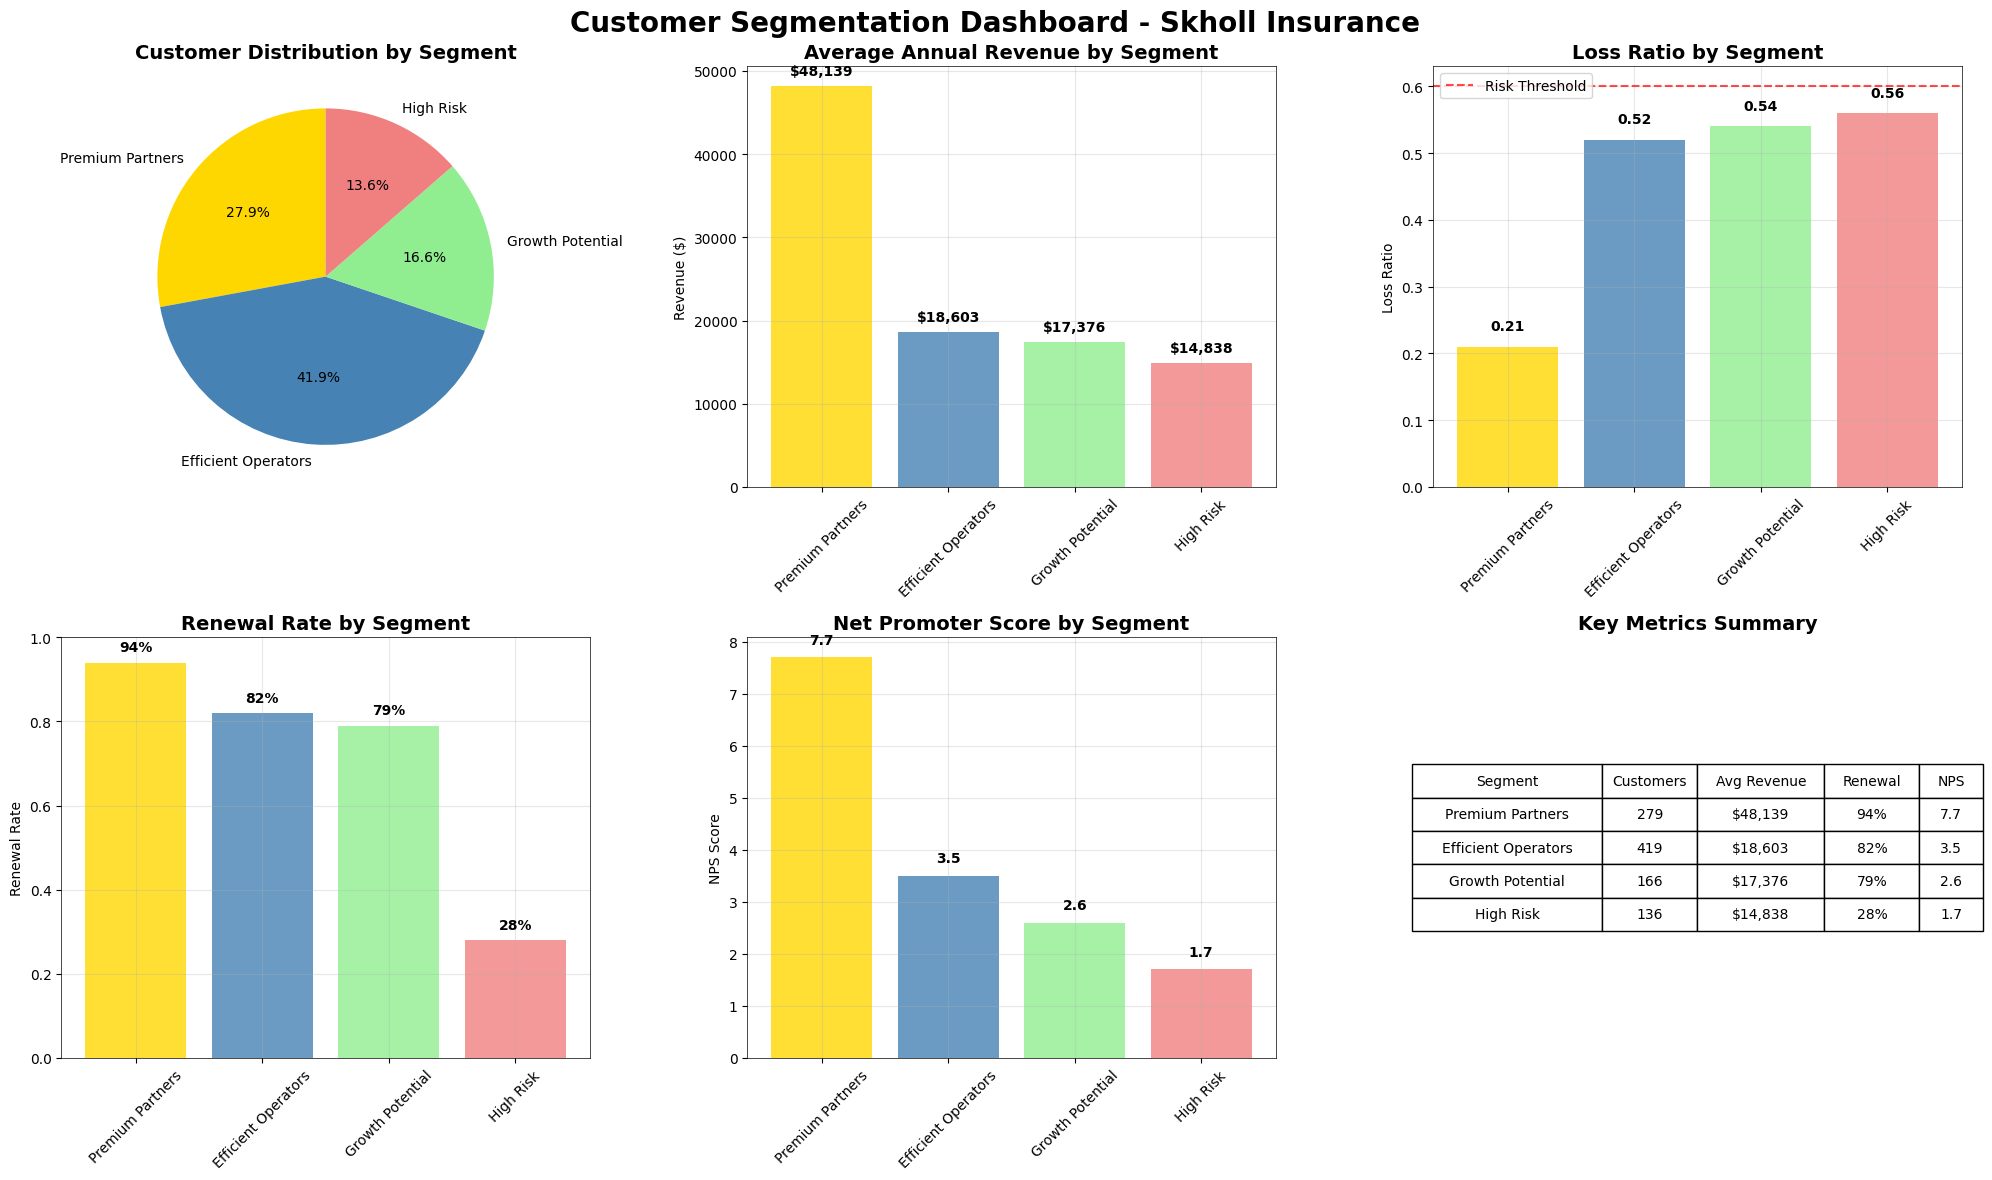

✅ Dashboard guardado como 'skholl_customer_dashboard.png'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [26]:
# ============================================================================
# DASHBOARD SIMPLE CON MATPLOTLIB - FUNCIONA 100% EN COLAB
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Datos reales de tu análisis
segment_data = {
    'Segment': ['Premium Partners', 'Efficient Operators', 'Growth Potential', 'High Risk'],
    'Customer_Count': [279, 419, 166, 136],
    'Avg_Revenue': [48139, 18603, 17376, 14838],
    'Loss_Ratio': [0.21, 0.52, 0.54, 0.56],
    'Renewal_Rate': [0.94, 0.82, 0.79, 0.28],
    'NPS_Score': [7.7, 3.5, 2.6, 1.7],
    'Percentage': [27.9, 41.9, 16.6, 13.6]
}

dashboard_df = pd.DataFrame(segment_data)

# Crear dashboard de 6 gráficos
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Customer Segmentation Dashboard - Skholl Insurance', fontsize=20, fontweight='bold', y=0.98)

# Colores por segmento
colors = ['#FFD700', '#4682B4', '#90EE90', '#F08080']  # Gold, Steel Blue, Light Green, Light Coral

# 1. Customer Distribution (Pie Chart)
axes[0,0].pie(dashboard_df['Customer_Count'], labels=dashboard_df['Segment'], autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[0,0].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')

# 2. Average Revenue by Segment (Bar Chart)
bars1 = axes[0,1].bar(dashboard_df['Segment'], dashboard_df['Avg_Revenue'], color=colors, alpha=0.8)
axes[0,1].set_title('Average Annual Revenue by Segment', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Revenue ($)')
axes[0,1].tick_params(axis='x', rotation=45)
# Add value labels
for i, v in enumerate(dashboard_df['Avg_Revenue']):
    axes[0,1].text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Loss Ratio by Segment
bars2 = axes[0,2].bar(dashboard_df['Segment'], dashboard_df['Loss_Ratio'], color=colors, alpha=0.8)
axes[0,2].set_title('Loss Ratio by Segment', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('Loss Ratio')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].axhline(y=0.6, color='red', linestyle='--', alpha=0.7, label='Risk Threshold')
axes[0,2].legend()
# Add value labels
for i, v in enumerate(dashboard_df['Loss_Ratio']):
    axes[0,2].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. Renewal Rate by Segment
bars3 = axes[1,0].bar(dashboard_df['Segment'], dashboard_df['Renewal_Rate'], color=colors, alpha=0.8)
axes[1,0].set_title('Renewal Rate by Segment', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Renewal Rate')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylim(0, 1)
# Add value labels
for i, v in enumerate(dashboard_df['Renewal_Rate']):
    axes[1,0].text(i, v + 0.02, f'{v:.0%}', ha='center', va='bottom', fontweight='bold')

# 5. NPS Score by Segment
bars4 = axes[1,1].bar(dashboard_df['Segment'], dashboard_df['NPS_Score'], color=colors, alpha=0.8)
axes[1,1].set_title('Net Promoter Score by Segment', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('NPS Score')
axes[1,1].tick_params(axis='x', rotation=45)
# Add value labels
for i, v in enumerate(dashboard_df['NPS_Score']):
    axes[1,1].text(i, v + 0.2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 6. Summary Table
axes[1,2].axis('tight')
axes[1,2].axis('off')
table_data = []
for i, row in dashboard_df.iterrows():
    table_data.append([
        row['Segment'],
        f"{row['Customer_Count']:,}",
        f"${row['Avg_Revenue']:,.0f}",
        f"{row['Renewal_Rate']:.0%}",
        f"{row['NPS_Score']:.1f}"
    ])

table = axes[1,2].table(cellText=table_data,
                       colLabels=['Segment', 'Customers', 'Avg Revenue', 'Renewal', 'NPS'],
                       cellLoc='center',
                       loc='center',
                       colWidths=[0.3, 0.15, 0.2, 0.15, 0.1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
axes[1,2].set_title('Key Metrics Summary', fontsize=14, fontweight='bold')

# Style improvements
for ax in axes.flat:
    if ax != axes[1,2]:  # Skip table
        ax.grid(True, alpha=0.3)
        for spine in ax.spines.values():
            spine.set_linewidth(0.5)

plt.tight_layout()
plt.show()

# Guardar como imagen de alta calidad
plt.savefig('skholl_customer_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Dashboard guardado como 'skholl_customer_dashboard.png'")

# Descargar
from google.colab import files
files.download('skholl_customer_dashboard.png')